In [1]:
from sklearn import datasets
iris = datasets.load_iris()

In [2]:
print(iris.target_names)

print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [3]:
print(iris.data[0:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [4]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [5]:
type(iris.data), type(iris.target)

(numpy.ndarray, numpy.ndarray)

In [9]:
import pandas as pd
data = pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})
data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
X = data[['sepal length','sepal width','petal length','petal width']]
y = data['species']

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30)

In [12]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [13]:
from sklearn import metrics

metrics.confusion_matrix(y_test,y_pred)

array([[14,  0,  0],
       [ 0, 16,  1],
       [ 0,  1, 13]], dtype=int64)

In [14]:
metrics.accuracy_score(y_test,y_pred)

0.9555555555555556

In [16]:
clf.predict([[3,5,4,2]])

array([1])

In [17]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
feature_imp

petal length (cm)    0.463892
petal width (cm)     0.390228
sepal length (cm)    0.115137
sepal width (cm)     0.030743
dtype: float64

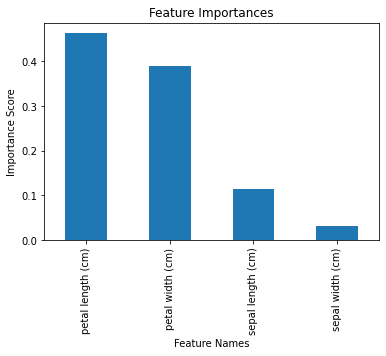

In [18]:
import matplotlib.pyplot as plt

# create a bar plot of feature importances
fig, ax = plt.subplots()
feature_imp.plot(kind='bar', ax=ax)

# set the plot title and labels
ax.set_title('Feature Importances')
ax.set_xlabel('Feature Names')
ax.set_ylabel('Importance Score')
plt.show()

In [19]:
X = data[['petal length','petal width']]
y = data['species']

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30)

In [21]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [22]:
from sklearn import metrics

metrics.confusion_matrix(y_test,y_pred)

array([[20,  0,  0],
       [ 0, 13,  2],
       [ 0,  1,  9]], dtype=int64)

In [23]:
metrics.accuracy_score(y_test,y_pred)

0.9333333333333333